## Scraping

https://www.scientificamerican.com/

O site da *Scientific American* é importante por ser uma das fontes mais renomadas de divulgação científica, com credibilidade histórica desde 1845. Ele traduz pesquisas complexas em linguagem acessível, cobrindo temas como saúde, tecnologia e meio ambiente. Além de educar, combate a desinformação e estimula o pensamento crítico. Com recursos multimídia e alcance global, conecta a ciência ao público geral, promovendo uma sociedade mais bem informada.


Exploraremos a análise das diversas últimas postagens do site, começando da raspagem de dados até uma análise interessante sobre nossas extrações!

In [31]:
import requests
from bs4 import BeautifulSoup

In [32]:
# URL da vítima
url = "https://www.scientificamerican.com/latest/"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [33]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida

<Response [200]>

In [34]:
soup = BeautifulSoup(response.text, "html.parser")

In [35]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>News | Scientific American</title>
<link href="https://www.scientificamerican.com/news/" rel="canonical"/>
<meta content="#fff" name="theme-color"/>
<meta content="max-image-preview:standard" name="robots"/>
<link rel="image_src" src="https://www.scientificamerican.com/static/sciam-mark.jpg"/>
<meta content="https://www.scientificamerican.com/news/" property="og:url"/>
<meta content="https://www.scientificamerican.com/static/sciam-mark.jpg" property="og:image"/>
<meta content="https://www.scientificamerican.com/static/sciam-mark.jpg" name="twitter:image"/>
<meta content="News and research about News, including commentary and archival articles published in Scientific American." name="description"/>
<meta content="News" property="og:title"/>
<meta content="News and research about News, including commentary and archival articles published in Scientific American." property="og:description"/>
<meta content="Scientific A

In [36]:
# Exibe o html como texto
print(soup.get_text())





News | Scientific American





















































Skip to main contentScientific AmericanLatest StoriesOpinionDecember 21, 2024How Feminism Can Guide Climate Change ActionFeminism gives us the analysis, tools and movement to create a better climate future for everyone. It’s time to embrace itLaura Turquet, Silke Staab, Brianna HowellEvolutionDecember 20, 2024Run, Lucy, Run! Human Ancestors Could Jog but Not Very Far or Fast3D models of Australopithecus afarensis hint at the muscular adaptations that made modern humans better runnersGemma Conroy, Nature magazineSolar systemDecember 20, 2024Ancient Moon Melt Event May Explain 150-Million-Year Gap in Age EstimatesThe moon may have melted 4.35 billion years ago—explaining a lunar age mysteryPayal DharPublic HealthDecember 20, 2024How the U.S. Lost Control of Bird Flu, Setting the Stage for Another PandemicAs the bird flu virus moved into cows and people, sluggish federal action, deference to industry and n

In [37]:
articles = soup.find_all("article", class_="article-pFLe7")

In [38]:
articles

[<article class="article-pFLe7 articleListItem-EDtwh item-NF5qX"><a class="articleLink-2OMNo" data-testid="article-link" href="/article/how-feminism-can-guide-climate-change-action/"><figure category="Climate Change" class="articleFigure-Q7l9w" style="--ratio:var(--image-ratio, 56.25%)"><img alt="Woman with a braid standing confidently in front of solar panels and wind turbines under a blue sky" class="articleImg-Ls3LK" loading="eager" src="https://static.scientificamerican.com/dam/m/97958fa2323fd5a/original/Woman_with_solar_panels.jpg?m=1734795993.841&amp;w=450"/></figure><div class="kickerContainer-U9kI5"><div class="kicker-EEaW-">Opinion<span class="kickerSpacer-I99oW"></span><span class="kickerMeta-0zV3t">December 21, 2024</span></div></div><h2 class="articleTitle-mtY5p"><p>How Feminism Can Guide Climate Change Action</p></h2></a><section class="articleInfo-EjcxZ"><div class="dek-KweYs"><p>Feminism gives us the analysis, tools and movement to create a better climate future for ever

In [39]:
news_list = []

for article in articles:
    try:
        # Extrair título
        title = article.find("h2", class_="articleTitle-mtY5p").get_text(strip=True)

        # Extrair link
        link = article.find("a", class_="articleLink-2OMNo")["href"]
        full_link = "https://www.scientificamerican.com" + link

        # Extrair categoria e data
        kicker = article.find("div", class_="kicker-EEaW-").get_text(strip=True)
        category, date = kicker.split("December")
        date = "December" + date

        # Extrair resumo
        summary = article.find("div", class_="dek-KweYs").get_text(strip=True)

        # Extrair autores
        authors = article.find("p", class_="authors-NCGt1").get_text(strip=True)

        article_info = {
            "title": title,
            "link": full_link,
            "category": category.strip(),
            "date": date.strip(),
            "summary": summary,
            "authors": authors
        }

        news_list.append(article_info)
    except:
        continue

# Exibir os resultados
for article in news_list:
    print("\nTítulo:", article["title"])
    print("Categoria:", article["category"])
    print("Data:", article["date"])
    print("Autores:", article["authors"])
    print("Resumo:", article["summary"])
    print("Link:", article["link"])
    print("-" * 80)


Título: How Feminism Can Guide Climate Change Action
Categoria: Opinion
Data: December 21, 2024
Autores: Laura Turquet, Silke Staab, Brianna Howell
Resumo: Feminism gives us the analysis, tools and movement to create a better climate future for everyone. It’s time to embrace it
Link: https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/
--------------------------------------------------------------------------------

Título: Run, Lucy, Run! Human Ancestors Could Jog but Not Very Far or Fast
Categoria: Evolution
Data: December 20, 2024
Autores: Gemma Conroy, Nature magazine
Resumo: 3D models ofAustralopithecus afarensishint at the muscular adaptations that made modern humans better runners
Link: https://www.scientificamerican.com/article/run-lucy-run-human-ancestors-could-jog-but-not-very-far-or-fast/
--------------------------------------------------------------------------------

Título: Ancient Moon Melt Event May Explain 150-Million-Year Gap in Ag

In [40]:
# Pegar o primeiro artigo da lista como exemplo
primeiro_artigo = news_list[0]
url_artigo = primeiro_artigo["link"]

# Fazer a requisição
response = requests.get(url_artigo, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Vamos ver como é a estrutura da página do artigo
# Geralmente o texto principal fica em uma div específica
print("URL do artigo:", url_artigo)
print("\nEstrutura da página:")

# Primeiro vamos tentar encontrar o corpo do artigo
article_body = soup.find("div", {"class": "article-content"})
if article_body:
    print("\nConteúdo do artigo:")
    print(article_body.get_text(strip=True))
else:
    print("\nNão encontrou o corpo do artigo com essa classe, vamos ver a estrutura completa:")
    print(soup.prettify())  # Mostra os primeiros 1000 caracteres para análise

URL do artigo: https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/

Estrutura da página:

Não encontrou o corpo do artigo com essa classe, vamos ver a estrutura completa:
<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   How Feminism Can Guide Climate Change Action | Scientific American
  </title>
  <link href="https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/" rel="canonical"/>
  <meta content="#fff" name="theme-color"/>
  <meta content="max-image-preview:large" name="robots"/>
  <link rel="image_src" src="https://static.scientificamerican.com/dam/m/97958fa2323fd5a/original/Woman_with_solar_panels.jpg?m=1734795993.841&amp;w=1200"/>
  <meta content="https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/" property="og:url"/>
  <meta content="https://static.scientificamerican.com/dam/m/97958fa2323fd5a/original/Woman_with_solar_panels.jpg?m=1734795993

In [43]:
def extrair_info_artigo_lista(article):
    """Extrai informações básicas da lista de artigos."""
    try:
        title = article.find("h2", class_="articleTitle-mtY5p").get_text(strip=True)
        link = article.find("a", class_="articleLink-2OMNo")["href"]
        full_link = "https://www.scientificamerican.com" + link
        kicker = article.find("div", class_="kicker-EEaW-").get_text(strip=True)
        category, date = kicker.split("December")
        date = "December" + date
        summary = article.find("div", class_="dek-KweYs").get_text(strip=True)
        authors = article.find("p", class_="authors-NCGt1").get_text(strip=True)
        return {
            "title": title,
            "link": full_link,
            "category": category.strip(),
            "date": date.strip(),
            "summary": summary,
            "authors": authors
        }
    except:
        return None



def extrair_info_artigo_completo(url):
    """Extrai informações detalhadas da página do artigo."""
    # Código da função que enviei anteriormente...
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar URL {url}: {e}")
        return None

    try:
        # Encontra a data de publicação e tempo de leitura (agora ambos estão em um mesmo elemento)
        date_read_time = soup.find('div', class_='article_date_and_read_time-yLEUt')
        if date_read_time:
           date_pub = date_read_time.find("p", class_="article_pub_date-EsKM-").get_text(strip=True) if date_read_time.find("p", class_="article_pub_date-EsKM-") else None
           read_time = date_read_time.find("p", class_="article_read_time-zEJJG").get_text(strip=True) if date_read_time.find("p", class_="article_read_time-zEJJG") else None

        else:
           date_pub = None
           read_time = None


        # Extrair o tipo do artigo (se disponível) - usando o rótulo
        article_label = soup.find('p', class_='article_label--S3mY')
        article_type = article_label.get_text(strip=True) if article_label else None

        # Extrair o texto completo do artigo
        article_body = soup.find("div", class_=["body-n28ll", "prose-Yw0x0", "prose-v4bYC", "article__body-ivA3W"])
        full_text = ""
        if article_body:
            paragraphs = article_body.find_all("p")
            full_text = "\n".join([p.get_text(strip=True) for p in paragraphs])


        # Extrair informações do script com JSON
        script_tag = soup.find('script', id='__DATA__')
        if script_tag:
            data = script_tag.string.replace("window.__DATA__=JSON.parse(`", "").replace("`)", "")
            import json
            try:
                json_data = json.loads(data)

                # extrair dificuldade e sentimento
                content_modeling = json_data.get('initialData', {}).get('article', {}).get('content_modeling', [])
                difficulty_str = json_data.get('initialData', {}).get('article', {}).get('content_difficulty')
                sentiment_str = json_data.get('initialData', {}).get('article', {}).get('sentiment')

                if difficulty_str:
                  difficulty = difficulty_str
                else:
                  difficulty = None

                if sentiment_str:
                    sentiment = sentiment_str
                else:
                     sentiment = None




                # Extrair autores do JSON
                authors_json = json_data.get('initialData', {}).get('article', {}).get('authors', [])
                authors_names_list = [author.get('name') for author in authors_json if author and author.get('name')]
                authors_names = ', '.join(authors_names_list) if authors_names_list else None



            except json.JSONDecodeError as e:
                 print(f"Erro ao decodificar JSON: {e}")
                 authors_names = None
                 difficulty = None
                 sentiment = None

        else:
            authors_names = None
            difficulty = None
            sentiment = None


        return {
           "date_pub": date_pub,
            "read_time": read_time,
            "type": article_type,
            "full_text": full_text,
            "authors_names": authors_names,
            "difficulty": difficulty,
            "sentiment": sentiment,

        }

    except Exception as e:
        print(f"Erro ao extrair informações detalhadas de {url}: {e}")
        return None

In [45]:
news_list = []
for article in articles:
    info_lista = extrair_info_artigo_lista(article) # sua funcao para extrair as infos da pagina inicial
    if info_lista:
        info_completa = extrair_info_artigo_completo(info_lista["link"]) # chama a funcao que extrai infos de cada artigo
        if info_completa:
            news_list.append({**info_lista, **info_completa})

        else:
            news_list.append(info_lista)


for article in news_list:
    print("\nTítulo:", article.get("title", "N/A"))
    print("Data de Publicação:", article.get("date_pub", "N/A"))
    print("Tempo de Leitura:", article.get("read_time", "N/A"))
    print("Tipo:", article.get("type", "N/A"))
    print("Dificuldade:", article.get("difficulty", "N/A"))
    print("Sentimento:", article.get("sentiment", "N/A"))
    print("Autores:", article.get("authors_names", article.get("authors","N/A")))
    print("Resumo:", article.get("summary", "N/A"))
    print("Link:", article.get("link", "N/A"))
    print("\nTexto Completo:\n", article.get("full_text", "N/A"))
    print("-" * 80)

Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 1008 (char 1007)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 10734 (char 10733)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 1315 (char 1314)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 2581 (char 2580)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 1008 (char 1007)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 846 (char 845)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 2225 (char 2224)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 754 (char 753)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 1390 (char 1389)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 980 (char 979)
Erro ao decodificar JSON: Expecting ',' delimiter: line 1 column 967 (char 966)

Título: How Feminism Can Guide Climate Change Action
Data de Publicação: December 21, 2024
Tempo de Lei

In [50]:
import requests
from bs4 import BeautifulSoup
import json
import re

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

def extrair_info_artigo_lista(article):
    """Extrai informações básicas da lista de artigos."""
    try:
        title = article.find("h2", class_="articleTitle-mtY5p").get_text(strip=True)
        link = article.find("a", class_="articleLink-2OMNo")["href"]
        full_link = "https://www.scientificamerican.com" + link
        kicker = article.find("div", class_="kicker-EEaW-").get_text(strip=True)
        category, date = kicker.split("December")
        date = "December" + date
        summary = article.find("div", class_="dek-KweYs").get_text(strip=True)
        authors = article.find("p", class_="authors-NCGt1").get_text(strip=True)
        return {
            "title": title,
            "link": full_link,
            "category": category.strip(),
            "date": date.strip(),
            "summary": summary,
            "authors": authors
        }
    except:
        return None

def extrair_info_artigo_completo(url):
    """Extrai informações detalhadas da página do artigo."""
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar URL {url}: {e}")
        return None

    try:
        # Encontra a data de publicação e tempo de leitura (agora ambos estão em um mesmo elemento)
        date_read_time = soup.find('div', class_='article_date_and_read_time-yLEUt')
        if date_read_time:
           date_pub = date_read_time.find("p", class_="article_pub_date-EsKM-").get_text(strip=True) if date_read_time.find("p", class_="article_pub_date-EsKM-") else None
           read_time = date_read_time.find("p", class_="article_read_time-zEJJG").get_text(strip=True) if date_read_time.find("p", class_="article_read_time-zEJJG") else None

        else:
           date_pub = None
           read_time = None


        # Extrair o tipo do artigo (se disponível) - usando o rótulo
        article_label = soup.find('p', class_='article_label--S3mY')
        article_type = article_label.get_text(strip=True) if article_label else None

        # Extrair o texto completo do artigo
        article_body = soup.find("div", class_=["body-n28ll", "prose-Yw0x0", "prose-v4bYC", "article__body-ivA3W"])
        full_text = ""
        if article_body:
            paragraphs = article_body.find_all("p")
            full_text = "\n".join([p.get_text(strip=True) for p in paragraphs])


        # Extrair informações do script com JSON
        script_tag = soup.find('script', id='__DATA__')
        if script_tag:
            data = script_tag.string
            if data:
                if data.startswith("window.__DATA__=JSON.parse(`"):
                    data = data[len("window.__DATA__=JSON.parse(`"):]
                if data.endswith("`)"):
                    data = data[:-len("`)")]

                # Remove quebras de linha e caracteres de controle
                data = re.sub(r'[\n\r\t]+', ' ', data)

                # Substituir aspas
                data = data.replace('\\"', '"')

                try:
                    json_data = json.loads(data)

                    # extrair dificuldade e sentimento
                    difficulty_str = json_data.get('initialData', {}).get('article', {}).get('content_difficulty')
                    sentiment_str = json_data.get('initialData', {}).get('article', {}).get('sentiment')

                    if difficulty_str:
                        difficulty = difficulty_str
                    else:
                        difficulty = None
                    if sentiment_str:
                        sentiment = sentiment_str
                    else:
                        sentiment = None

                    # Extrair autores do JSON
                    authors_json = json_data.get('initialData', {}).get('article', {}).get('authors', [])
                    authors_names_list = [author.get('name') for author in authors_json if author and author.get('name')]
                    authors_names = ', '.join(authors_names_list) if authors_names_list else None

                except json.JSONDecodeError as e:
                    print(f"Erro ao decodificar JSON: {e}")
                    print("Conteúdo do JSON que falhou:", data)
                    authors_names = None
                    difficulty = None
                    sentiment = None
            else:
                authors_names = None
                difficulty = None
                sentiment = None

        else:
            authors_names = None
            difficulty = None
            sentiment = None


        return {
           "date_pub": date_pub,
            "read_time": read_time,
            "type": article_type,
            "full_text": full_text,
            "authors_names": authors_names,
            "difficulty": difficulty,
            "sentiment": sentiment,

        }

    except Exception as e:
        print(f"Erro ao extrair informações detalhadas de {url}: {e}")
        return None



# URL da vítima
url = "https://www.scientificamerican.com/latest/"

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

articles = soup.find_all("article", class_="article-pFLe7")

news_list = []
for article in articles:
    info_lista = extrair_info_artigo_lista(article)
    if info_lista:
        info_completa = extrair_info_artigo_completo(info_lista["link"])
        if info_completa:
            news_list.append({**info_lista, **info_completa})
        else:
           news_list.append(info_lista)


# Exibir os resultados
for article in news_list:
    print("\nTítulo:", article.get("title", "N/A"))
    print("Data de Publicação:", article.get("date_pub", "N/A"))
    print("Tempo de Leitura:", article.get("read_time", "N/A"))
    print("Tipo:", article.get("type", "N/A"))
    print("Dificuldade:", article.get("difficulty", "N/A"))
    print("Sentimento:", article.get("sentiment", "N/A"))
    print("Autores:", article.get("authors_names", article.get("authors","N/A")))
    print("Resumo:", article.get("summary", "N/A"))
    print("Link:", article.get("link", "N/A"))
    print("\nTexto Completo:\n", article.get("full_text", "N/A"))
    print("-" * 80)


Título: How Feminism Can Guide Climate Change Action
Data de Publicação: December 21, 2024
Tempo de Leitura: 5min read
Tipo: Opinion
Dificuldade: easy
Sentimento: positive
Autores: Laura Turquet, Silke Staab, Brianna Howell
Resumo: Feminism gives us the analysis, tools and movement to create a better climate future for everyone. It’s time to embrace it
Link: https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/

Texto Completo:
 Thisyear is projectedto be thehottest on record.The latest United Nations estimatesindicate that, without radical and immediate action, we are headed towardan increasingly unlivable planetwith an increase of up to 3.1 degrees Celsius by the end of the century. Solving the climate crisis requires urgent, global cooperation.
But the yearly global climate meeting (called the Conference of the Parties, or COP) held in November in the petrostate of Azerbaijan upheld the status quo, at best. The current economic system that underpi

In [51]:
import requests
from bs4 import BeautifulSoup
import json
import re

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

def extrair_info_artigo_lista(article):
    """Extrai informações básicas da lista de artigos."""
    try:
        title = article.find("h2", class_="articleTitle-mtY5p").get_text(strip=True)
        link = article.find("a", class_="articleLink-2OMNo")["href"]
        full_link = "https://www.scientificamerican.com" + link
        kicker = article.find("div", class_="kicker-EEaW-").get_text(strip=True)
        category, date = kicker.split("December")
        date = "December" + date
        summary = article.find("div", class_="dek-KweYs").get_text(strip=True)
        authors = article.find("p", class_="authors-NCGt1").get_text(strip=True)
        return {
            "title": title,
            "link": full_link,
            "category": category.strip(),
            "date": date.strip(),
            "summary": summary,
            "authors": authors
        }
    except:
        return None

def extrair_info_artigo_completo(url):
    """Extrai informações detalhadas da página do artigo."""
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar URL {url}: {e}")
        return None

    try:
        # Encontra a data de publicação e tempo de leitura (agora ambos estão em um mesmo elemento)
        date_read_time = soup.find('div', class_='article_date_and_read_time-yLEUt')
        if date_read_time:
           date_pub = date_read_time.find("p", class_="article_pub_date-EsKM-").get_text(strip=True) if date_read_time.find("p", class_="article_pub_date-EsKM-") else None
           read_time = date_read_time.find("p", class_="article_read_time-zEJJG").get_text(strip=True) if date_read_time.find("p", class_="article_read_time-zEJJG") else None

        else:
           date_pub = None
           read_time = None


        # Extrair o tipo do artigo (se disponível) - usando o rótulo
        article_label = soup.find('p', class_='article_label--S3mY')
        article_type = article_label.get_text(strip=True) if article_label else None

        # Extrair o texto completo do artigo
        article_body = soup.find("div", class_=["body-n28ll", "prose-Yw0x0", "prose-v4bYC", "article__body-ivA3W"])
        full_text = ""
        if article_body:
            paragraphs = article_body.find_all("p")
            full_text = "\n".join([p.get_text(strip=True) for p in paragraphs])


        # Extrair informações do script com JSON
        script_tag = soup.find('script', id='__DATA__')
        if script_tag:
            data = script_tag.string
            if data:
                if data.startswith("window.__DATA__=JSON.parse(`"):
                    data = data[len("window.__DATA__=JSON.parse(`"):]
                if data.endswith("`)"):
                    data = data[:-len("`)")]

                # Remove quebras de linha e caracteres de controle
                data = re.sub(r'[\n\r\t]+', ' ', data)

                # Substituir aspas
                data = data.replace('\\"', '"')

                try:
                    json_data = json.loads(data)

                    # extrair dificuldade e sentimento
                    difficulty_str = json_data.get('initialData', {}).get('article', {}).get('content_difficulty')
                    sentiment_str = json_data.get('initialData', {}).get('article', {}).get('sentiment')

                    if difficulty_str:
                        difficulty = difficulty_str
                    else:
                        difficulty = None
                    if sentiment_str:
                        sentiment = sentiment_str
                    else:
                        sentiment = None

                    # Extrair autores do JSON
                    authors_json = json_data.get('initialData', {}).get('article', {}).get('authors', [])
                    authors_names_list = [author.get('name') for author in authors_json if author and author.get('name')]
                    authors_names = ', '.join(authors_names_list) if authors_names_list else None

                except json.JSONDecodeError as e:
                    print(f"Erro ao decodificar JSON: {e}")
                    print("Conteúdo do JSON que falhou:", data)
                    authors_names = None
                    difficulty = None
                    sentiment = None
            else:
                authors_names = None
                difficulty = None
                sentiment = None

        else:
            authors_names = None
            difficulty = None
            sentiment = None


        return {
           "date_pub": date_pub,
            "read_time": read_time,
            "type": article_type,
            "full_text": full_text,
            "authors_names": authors_names,
            "difficulty": difficulty,
            "sentiment": sentiment,

        }

    except Exception as e:
        print(f"Erro ao extrair informações detalhadas de {url}: {e}")
        return None


# URL base da lista de artigos
base_url = "https://www.scientificamerican.com/latest/"

# Número de páginas que você quer coletar
num_pages = 3 # exemplo: 3 páginas

news_list = []

for page in range(1, num_pages + 1):

    # Cria a URL da página
    url = base_url if page == 1 else f"{base_url}?page={page}"

    print(f"Extraindo dados da página {page}: {url}")

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    articles = soup.find_all("article", class_="article-pFLe7")

    for article in articles:
        info_lista = extrair_info_artigo_lista(article)
        if info_lista:
            info_completa = extrair_info_artigo_completo(info_lista["link"])
            if info_completa:
                news_list.append({**info_lista, **info_completa})
            else:
               news_list.append(info_lista)


# Exibir os resultados
for article in news_list:
    print("\nTítulo:", article.get("title", "N/A"))
    print("Data de Publicação:", article.get("date_pub", "N/A"))
    print("Tempo de Leitura:", article.get("read_time", "N/A"))
    print("Tipo:", article.get("type", "N/A"))
    print("Dificuldade:", article.get("difficulty", "N/A"))
    print("Sentimento:", article.get("sentiment", "N/A"))
    print("Autores:", article.get("authors_names", article.get("authors","N/A")))
    print("Resumo:", article.get("summary", "N/A"))
    print("Link:", article.get("link", "N/A"))
    print("\nTexto Completo:\n", article.get("full_text", "N/A"))
    print("-" * 80)

Extraindo dados da página 1: https://www.scientificamerican.com/latest/
Extraindo dados da página 2: https://www.scientificamerican.com/latest/?page=2
Extraindo dados da página 3: https://www.scientificamerican.com/latest/?page=3

Título: How Feminism Can Guide Climate Change Action
Data de Publicação: December 21, 2024
Tempo de Leitura: 5min read
Tipo: Opinion
Dificuldade: easy
Sentimento: positive
Autores: Laura Turquet, Silke Staab, Brianna Howell
Resumo: Feminism gives us the analysis, tools and movement to create a better climate future for everyone. It’s time to embrace it
Link: https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/

Texto Completo:
 Thisyear is projectedto be thehottest on record.The latest United Nations estimatesindicate that, without radical and immediate action, we are headed towardan increasingly unlivable planetwith an increase of up to 3.1 degrees Celsius by the end of the century. Solving the climate crisis requires urge

In [61]:
import requests
from bs4 import BeautifulSoup
import json
import re
import os

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

def extrair_info_artigo_lista(article):
    """Extrai informações básicas da lista de artigos."""
    try:
        title = article.find("h2", class_="articleTitle-mtY5p").get_text(strip=True)
        link = article.find("a", class_="articleLink-2OMNo")["href"]
        full_link = "https://www.scientificamerican.com" + link
        kicker = article.find("div", class_="kicker-EEaW-").get_text(strip=True)
        category, date = kicker.split("December")
        date = "December" + date
        summary = article.find("div", class_="dek-KweYs").get_text(strip=True)
        authors = article.find("p", class_="authors-NCGt1").get_text(strip=True)
        return {
            "title": title,
            "link": full_link,
            "category": category.strip(),
            "date": date.strip(),
            "summary": summary,
            "authors": authors
        }
    except:
        return None

def extrair_info_artigo_completo(url):
    """Extrai informações detalhadas da página do artigo."""
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
    except requests.exceptions.RequestException as e:
        print(f"Erro ao acessar URL {url}: {e}")
        return None

    try:
        # Encontra a data de publicação e tempo de leitura (agora ambos estão em um mesmo elemento)
        date_read_time = soup.find('div', class_='article_date_and_read_time-yLEUt')
        if date_read_time:
           date_pub = date_read_time.find("p", class_="article_pub_date-EsKM-").get_text(strip=True) if date_read_time.find("p", class_="article_pub_date-EsKM-") else None
           read_time = date_read_time.find("p", class_="article_read_time-zEJJG").get_text(strip=True) if date_read_time.find("p", class_="article_read_time-zEJJG") else None

        else:
           date_pub = None
           read_time = None


        # Extrair o tipo do artigo (se disponível) - usando o rótulo
        article_label = soup.find('p', class_='article_label--S3mY')
        article_type = article_label.get_text(strip=True) if article_label else None

        # Extrair o texto completo do artigo
        article_body = soup.find("div", class_=["body-n28ll", "prose-Yw0x0", "prose-v4bYC", "article__body-ivA3W"])
        full_text = ""
        if article_body:
            paragraphs = article_body.find_all("p")
            full_text = "\n".join([p.get_text(strip=True) for p in paragraphs])


        # Extrair informações do script com JSON
        script_tag = soup.find('script', id='__DATA__')
        if script_tag:
            data = script_tag.string
            if data:
                if data.startswith("window.__DATA__=JSON.parse(`"):
                    data = data[len("window.__DATA__=JSON.parse(`"):]
                if data.endswith("`)"):
                    data = data[:-len("`)")]

                # Remove quebras de linha e caracteres de controle
                data = re.sub(r'[\n\r\t]+', ' ', data)

                # Substituir aspas
                data = data.replace('\\"', '"')


                try:
                    json_data = json.loads(data)

                    # extrair dificuldade e sentimento
                    difficulty_str = json_data.get('initialData', {}).get('article', {}).get('content_difficulty')
                    sentiment_str = json_data.get('initialData', {}).get('article', {}).get('sentiment')

                    if difficulty_str:
                        difficulty = difficulty_str
                    else:
                        difficulty = None
                    if sentiment_str:
                        sentiment = sentiment_str
                    else:
                        sentiment = None

                    # Extrair autores do JSON
                    authors_json = json_data.get('initialData', {}).get('article', {}).get('authors', [])
                    authors_names_list = [author.get('name') for author in authors_json if author and author.get('name')]
                    authors_names = ', '.join(authors_names_list) if authors_names_list else None

                except json.JSONDecodeError as e:
                    print(f"Erro ao decodificar JSON: {e}")
                    print("Conteúdo do JSON que falhou:", data)
                    authors_names = None
                    difficulty = None
                    sentiment = None
            else:
                authors_names = None
                difficulty = None
                sentiment = None
        else:
            authors_names = None
            difficulty = None
            sentiment = None


        return {
           "date_pub": date_pub,
            "read_time": read_time,
            "type": article_type,
            "full_text": full_text,
            "authors_names": authors_names,
            "difficulty": difficulty,
            "sentiment": sentiment,

        }

    except Exception as e:
        print(f"Erro ao extrair informações detalhadas de {url}: {e}")
        return None


# URL base da lista de artigos
base_url = "https://www.scientificamerican.com/latest/"

# Número de páginas que você quer coletar
num_pages = 15

# Cria a pasta "data" se ela não existir
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

post_count = 1  # Inicializa o contador de postagens (fora do loop)

for page in range(1, num_pages + 1):

    # Cria a URL da página
    url = base_url if page == 1 else f"{base_url}?page={page}"

    print(f"Extraindo dados da página {page}: {url}")

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    articles = soup.find_all("article", class_="article-pFLe7")

    for article in articles:
        info_lista = extrair_info_artigo_lista(article)
        if info_lista:
            info_completa = extrair_info_artigo_completo(info_lista["link"])
            if info_completa:
                article_data = {**info_lista, **info_completa}
            else:
                article_data = info_lista

            # Salva os dados em um arquivo JSON
            filename = os.path.join(output_dir, f"post_{post_count}.json")
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(article_data, f, ensure_ascii=False, indent=4)


            post_count += 1

Extraindo dados da página 1: https://www.scientificamerican.com/latest/
Extraindo dados da página 2: https://www.scientificamerican.com/latest/?page=2
Extraindo dados da página 3: https://www.scientificamerican.com/latest/?page=3
Extraindo dados da página 4: https://www.scientificamerican.com/latest/?page=4
Extraindo dados da página 5: https://www.scientificamerican.com/latest/?page=5
Extraindo dados da página 6: https://www.scientificamerican.com/latest/?page=6
Extraindo dados da página 7: https://www.scientificamerican.com/latest/?page=7
Extraindo dados da página 8: https://www.scientificamerican.com/latest/?page=8
Extraindo dados da página 9: https://www.scientificamerican.com/latest/?page=9
Extraindo dados da página 10: https://www.scientificamerican.com/latest/?page=10
Extraindo dados da página 11: https://www.scientificamerican.com/latest/?page=11
Extraindo dados da página 12: https://www.scientificamerican.com/latest/?page=12
Extraindo dados da página 13: https://www.scientifica

In [57]:
import json
import os

# Define o diretório onde os arquivos JSON estão salvos
diretorio_dados = "data"  # Certifique-se que este é o diretório correto

# Loop para ler os primeiros 10 arquivos JSON
for i in range(1, 11):
    nome_arquivo = f"post_{i}.json"
    caminho_completo = os.path.join(diretorio_dados, nome_arquivo)

    try:
        with open(caminho_completo, 'r', encoding='utf-8') as arquivo:
            dados = json.load(arquivo)
            print(f"Conteúdo do arquivo {nome_arquivo}:")
            print(json.dumps(dados, indent=4, ensure_ascii=False))  # Imprime o JSON formatado
            print("-" * 20)  # Separador para melhor visualização
    except FileNotFoundError:
        print(f"Arquivo {nome_arquivo} não encontrado no diretório {diretorio_dados}.")
    except json.JSONDecodeError:
        print(f"Erro ao decodificar JSON do arquivo {nome_arquivo}.")
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo {nome_arquivo}: {e}")

Conteúdo do arquivo post_1.json:
{
    "title": "How Feminism Can Guide Climate Change Action",
    "link": "https://www.scientificamerican.com/article/how-feminism-can-guide-climate-change-action/",
    "category": "Opinion",
    "date": "December 21, 2024",
    "summary": "Feminism gives us the analysis, tools and movement to create a better climate future for everyone. It’s time to embrace it",
    "authors": "Laura Turquet, Silke Staab, Brianna Howell",
    "date_pub": "December 21, 2024",
    "read_time": "5min read",
    "type": "Opinion",
    "full_text": "Thisyear is projectedto be thehottest on record.The latest United Nations estimatesindicate that, without radical and immediate action, we are headed towardan increasingly unlivable planetwith an increase of up to 3.1 degrees Celsius by the end of the century. Solving the climate crisis requires urgent, global cooperation.\nBut the yearly global climate meeting (called the Conference of the Parties, or COP) held in November in

# Análise dos dados


In [68]:
import os
import json
import re
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def criar_dataframe_pandas(pasta_jsons="data", total_arquivos=122):
    """
    Lê todos os arquivos JSON (post_1.json até post_{total_arquivos}.json) de uma pasta,
    extrai os campos e cria um DataFrame pandas com colunas em português.
    """

    lista_registros = []

    for i in range(1, total_arquivos + 1):
        nome_arquivo = os.path.join(pasta_jsons, f"post_{i}.json")

        if not os.path.isfile(nome_arquivo):
            print(f"Arquivo não encontrado: {nome_arquivo}")
            continue

        try:
            with open(nome_arquivo, 'r', encoding='utf-8') as f:
                data = json.load(f)
        except json.JSONDecodeError as e:
            print(f"Arquivo '{nome_arquivo}' não é um JSON válido ou está corrompido. Erro: {e}")
            continue
        except Exception as e:
            print(f"Erro inesperado ao abrir '{nome_arquivo}': {e}")
            continue

        try:
            # Extrair campos
            titulo = data.get("title", "N/A")
            data_publicacao = data.get("date_pub", "N/A")

            # Tempo de leitura pode vir em vários formatos
            read_time_raw = data.get("read_time", None)
            if not isinstance(read_time_raw, str):
                tempo_leitura_str = "N/A"
            else:
                tempo_leitura_str = read_time_raw

            # Extrai número (exemplo com regex)
            match_tempo = re.findall(r'(\d+)', tempo_leitura_str)
            if match_tempo:
                tempo_leitura_min = int(match_tempo[0])
            else:
                tempo_leitura_min = None

            tipo = data.get("type", "N/A")
            dificuldade = data.get("difficulty", "N/A")
            sentimento = data.get("sentiment", "N/A")

            # Autores
            autores = data.get("authors_names", data.get("authors", "N/A"))

            resumo = data.get("summary", "N/A")
            link = data.get("link", "N/A")
            texto_completo = data.get("full_text", "N/A")

            registro = {
                "titulo": titulo,
                "data_publicacao": data_publicacao,
                "tempo_leitura": tempo_leitura_str,
                "tempo_leitura_min": tempo_leitura_min,
                "tipo": tipo,
                "dificuldade": dificuldade,
                "sentimento": sentimento,
                "autores": autores,
                "resumo": resumo,
                "link": link,
                "texto_completo": texto_completo
            }

            lista_registros.append(registro)

        except Exception as e:
            print(f"Erro inesperado ao processar dados do arquivo {nome_arquivo}: {e}")

    # Criar DataFrame
    df = pd.DataFrame(lista_registros)
    return df

if __name__ == "__main__":
    df = criar_dataframe_pandas("data", 122)
    print(df.head())
    print(df.info())


                                              titulo    data_publicacao  \
0       How Feminism Can Guide Climate Change Action  December 21, 2024   
1  Run, Lucy, Run! Human Ancestors Could Jog but ...  December 20, 2024   
2  Ancient Moon Melt Event May Explain 150-Millio...  December 20, 2024   
3  How the U.S. Lost Control of Bird Flu, Setting...  December 19, 2024   
4  Why Six-Year-Olds Think Computing and Engineer...  December 20, 2024   

  tempo_leitura  tempo_leitura_min     tipo dificuldade sentimento  \
0     5min read                5.0  Opinion        easy   positive   
1     2min read                2.0     None        easy    neutral   
2     2min read                2.0     None        easy    neutral   
3    14min read               14.0     None        easy       None   
4     5min read                5.0  Opinion        easy    neutral   

                                      autores  \
0  Laura Turquet, Silke Staab, Brianna Howell   
1               Gemma Conroy, 

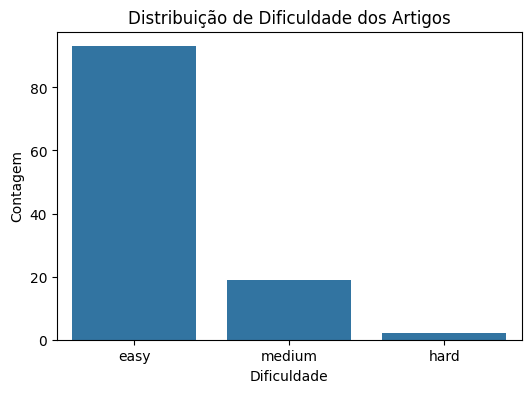

In [72]:
df_dif = df[df['dificuldade'].notna() & (df['dificuldade'] != 'N/A')]

plt.figure(figsize=(6,4))
sns.countplot(data=df_dif, x='dificuldade')
plt.title("Distribuição de Dificuldade dos Artigos")
plt.xlabel("Dificuldade")
plt.ylabel("Contagem")
plt.show()


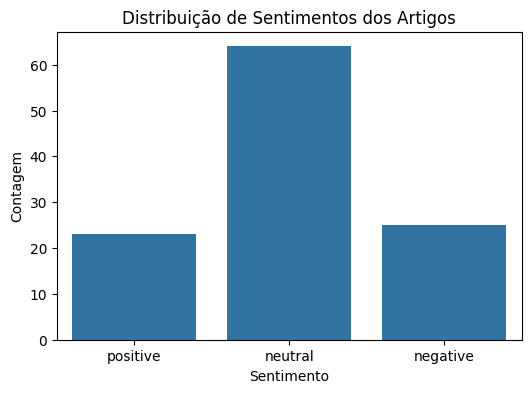

In [74]:
df_sent = df[df['sentimento'].notna() & (df['sentimento'] != 'N/A')]

plt.figure(figsize=(6,4))
sns.countplot(data=df_sent, x='sentimento')
plt.title("Distribuição de Sentimentos dos Artigos")
plt.xlabel("Sentimento")
plt.ylabel("Contagem")
plt.show()


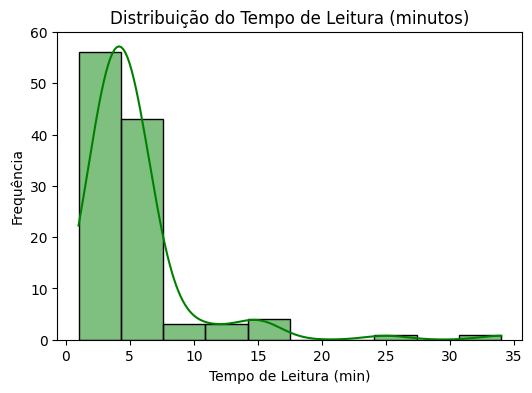

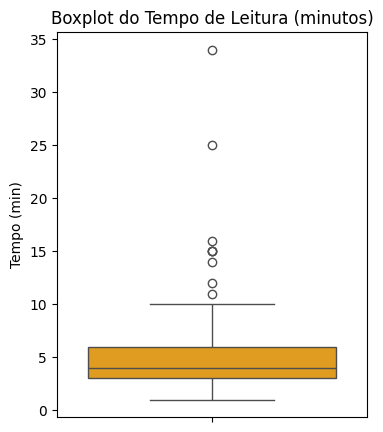

In [75]:
# Histograma
df_tempolim_ok = df[df['tempo_leitura_min'].notna()]

plt.figure(figsize=(6,4))
sns.histplot(df_tempolim_ok['tempo_leitura_min'], kde=True, color='green', bins=10)
plt.title("Distribuição do Tempo de Leitura (minutos)")
plt.xlabel("Tempo de Leitura (min)")
plt.ylabel("Frequência")
plt.show()

# Boxplot
plt.figure(figsize=(4,5))
sns.boxplot(y=df_tempolim_ok['tempo_leitura_min'], color='orange')
plt.title("Boxplot do Tempo de Leitura (minutos)")
plt.ylabel("Tempo (min)")
plt.show()


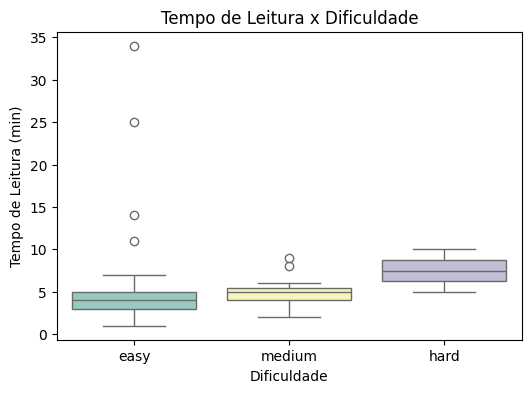

In [81]:
df_rel = df[(df['tempo_leitura_min'].notna()) & (df['dificuldade'].notna())]

plt.figure(figsize=(6,4))
sns.boxplot(data=df_rel, x='dificuldade', y='tempo_leitura_min', hue='dificuldade', palette='Set3', legend=False)
plt.title("Tempo de Leitura x Dificuldade")
plt.xlabel("Dificuldade")
plt.ylabel("Tempo de Leitura (min)")
plt.show()


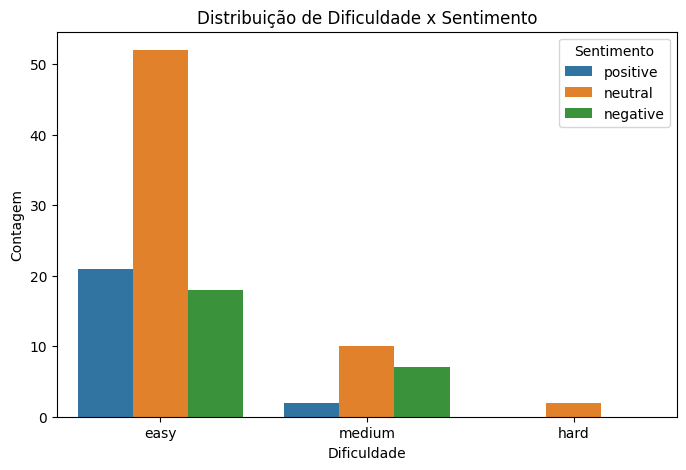

In [82]:
df_sent_dif = df[(df['sentimento'].notna()) & (df['dificuldade'].notna())]

plt.figure(figsize=(8,5))
sns.countplot(data=df_sent_dif, x='dificuldade', hue='sentimento')
plt.title("Distribuição de Dificuldade x Sentimento")
plt.xlabel("Dificuldade")
plt.ylabel("Contagem")
plt.legend(title="Sentimento")
plt.show()


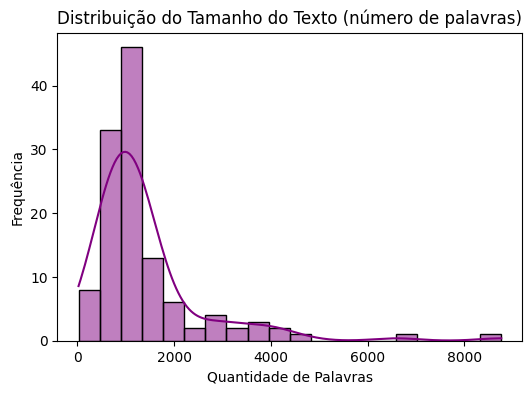

In [85]:
df['n_palavras'] = df['texto_completo'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.histplot(df['n_palavras'], bins=20, kde=True, color='purple')
plt.title("Distribuição do Tamanho do Texto (número de palavras)")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Frequência")
plt.show()


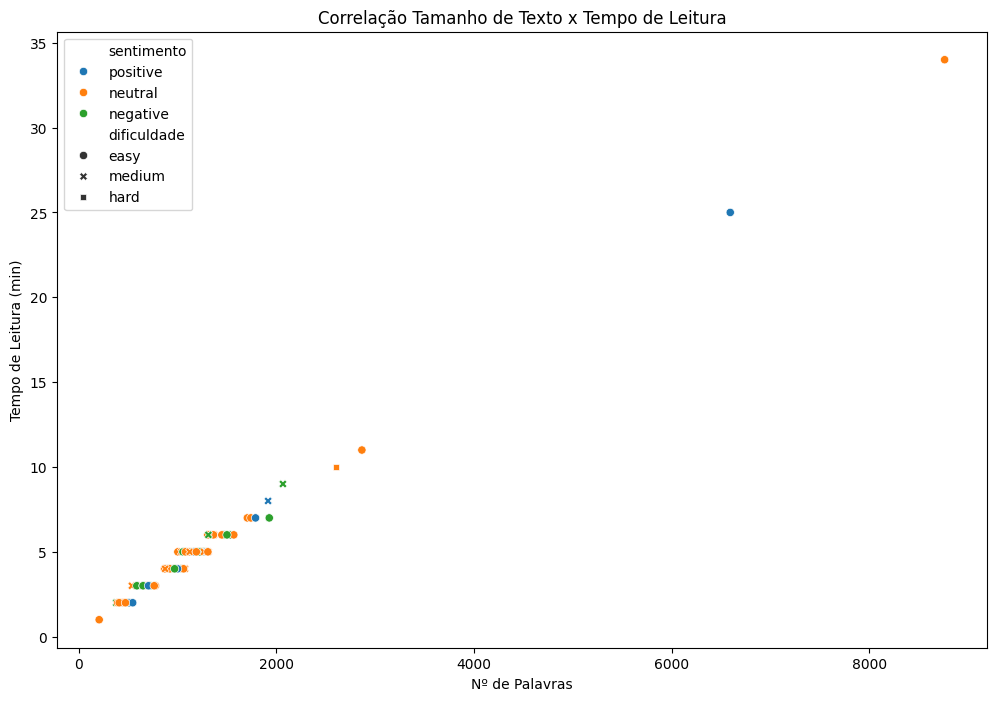

In [92]:
df_corr = df[(df['tempo_leitura_min'].notna()) & (df['n_palavras'].notna())]

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_corr, x='n_palavras', y='tempo_leitura_min', hue='sentimento', style='dificuldade')
plt.title("Correlação Tamanho de Texto x Tempo de Leitura")
plt.xlabel("Nº de Palavras")
plt.ylabel("Tempo de Leitura (min)")
plt.show()


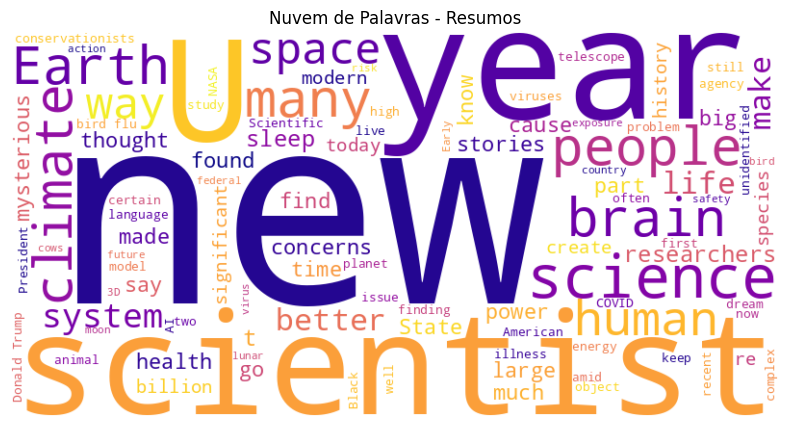

In [95]:
# pip install wordcloud (se precisar)

from wordcloud import WordCloud, STOPWORDS

texto_todos = " ".join(str(t) for t in df['resumo'])
stopwords = set(STOPWORDS)
stopwords.update([
    # Stopwords existentes
    "et", "al", "de", "para", "com", "se", "ao", "na", "em", "é", "da", "S",

    # Stopwords adicionais observadas na imagem
    "may", "one", "of", "to", "the", "and", "it",
    "a", "an", "be", "in", "is", "that", "this",
    "from", "by", "on", "or", "with", "at", "as",
    "are", "was", "were", "will", "would", "could",
    "should", "have", "has", "had", "been", "being",
    "do", "does", "did", "can", "about", "into",
    "up", "out", "so", "no", "not", "but"
])
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='plasma',
                      max_words=100).generate(texto_todos)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras - Resumos")
plt.show()


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preparar dados
textos = df['texto_completo'].fillna("")

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(textos)

# Definir número de tópicos
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()

def mostrar_top_palavras(modelo, feature_names, n_top_words=15):
    for idx, topic in enumerate(modelo.components_):
        print(f"Tópico {idx+1}:")
        top_features_indices = topic.argsort()[::-1][:n_top_words]
        top_features = [feature_names[i] for i in top_features_indices]
        print(" ".join(top_features))
        print("")

mostrar_top_palavras(lda, feature_names)


Tópico 1:
science like people new health really know just said time virus think public animals papp

Tópico 2:
says like people sleep brain just study time research years ai researchers new university human

Tópico 3:
says earth planet scientists years like stars life space new star way care people study



In [102]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/post_5.json (deflated 56%)
  adding: content/data/post_63.json (deflated 53%)
  adding: content/data/post_73.json (deflated 57%)
  adding: content/data/post_16.json (deflated 53%)
  adding: content/data/post_53.json (deflated 53%)
  adding: content/data/scientific_american_articles.json (stored 0%)
  adding: content/data/post_72.json (deflated 53%)
  adding: content/data/post_106.json (deflated 53%)
  adding: content/data/post_64.json (deflated 58%)
  adding: content/data/post_32.json (deflated 55%)
  adding: content/data/post_107.json (deflated 55%)
  adding: content/data/post_104.json (deflated 51%)
  adding: content/data/post_103.json (deflated 64%)
  adding: content/data/post_40.json (deflated 51%)
  adding: content/data/post_75.json (deflated 54%)
  adding: content/data/post_119.json (deflated 57%)
  adding: content/data/post_91.json (deflated 59%)
  adding: content/data/post_116.json (deflated 54%)
  adding: content/data/